# Dependencies

In [2]:
import re   # Working with regular expressions. Not needed to check if substring is contained in string
import matplotlib.pyplot as plt
from datetime import datetime
import time
import numpy as np
import os
import sys
import glob
import pandas

# Methods

In [ ]:
#%Y-%m-%d -give the date ,%f give microseconds

In [60]:
def t_str_to_ts(ts):
    tp = datetime.strptime(ts, '%H:%M:%S')
    return time.mktime(tp.timetuple()) + tp.microsecond/1e6

In [92]:
def get_time(string):
    pattern = re.compile("[0-9]{2}:[0-9]{2}:[0-9]{2}") # Abstract form of time stamps using regular expressions.
    pos = pattern.search(string) # Find the locations of the pattern in the string.
    
    # Timestamps have the form hh:mm:ss
    hrs = string[pos.start():pos.start()+2] 
    mins = string[pos.start()+3:pos.start()+5]
    secs = string[pos.start()+6:pos.start()+8]
    hrs
    # Return the hours, minutes and seconds, converted to numbers (here integers)
    return [int(hrs)*3600 + int(mins)*60 + int(secs)]



In [91]:
get_time("[16:11:14]{training.py:75} INFO - Starting trial 34 from the right with             0.4 s delay")

[57685]

# Data


In [25]:
path_m400060 = "NF_group1/m400060/"
directory_list = sorted(os.listdir( path_m400060 ))




active_trials = []
successes = []
failures = []
timeouts = []
dates = []


for directory in directory_list:
    file = [path_m400060 + directory + "/"+ file for file in os.listdir(path_m400060+directory) if "game" in file][0]
    at = []
    sc = []
    fl = []
    to = []
    dates.append(directory)
    with open(file,"r") as current_file:
        for line in current_file.readlines():
            if "Starting trial" in line:
                at.append(line)
            elif "goal" in line:
                sc.append(line)
            elif "overshoot" in line:
                fl.append(line)
            elif "timeout" in line:
                to.append(line)
                
    active_trials.append(at)
    successes.append(sc)
    failures.append(fl)
    timeouts.append(to)
    
    
    

number_trials = [len(list)-1 for list in active_trials]
number_successes = [len(list) for list in successes]
number_failures = [len(list) for list in failures]
number_timeouts = [len(list) for list in timeouts]

In [23]:
path_m400061 = "NF_group1/m400061/"
directory_list = sorted(os.listdir( path_m400061 ))




active_trials_61 = []
successes_61 = []
failures_61 = []
timeouts_61 = []
dates_61 = []


for directory in directory_list:
    file = [path_m400061 + directory + "/"+ file for file in os.listdir(path_m400061+directory) if "game" in file][0]
    at = []
    sc = []
    fl = []
    to = []
    dates.append(directory)
    with open(file,"r") as current_file:
        for line in current_file.readlines():
            if "Starting trial" in line:
                at.append(line)
            elif "goal" in line:
                sc.append(line)
            elif "overshoot" in line:
                fl.append(line)
            elif "timeout" in line:
                to.append(line)
                
    active_trials_61.append(at)
    successes_61.append(sc)
    failures_61.append(fl)
    timeouts_61.append(to)
    
    
    

number_trials_61 = [len(list)-1 for list in active_trials_61]
number_successes_61 = [len(list) for list in successes_61]
number_failures_61 = [len(list) for list in failures_61]
number_timeouts_61 = [len(list) for list in timeouts_61]

In [44]:
success_rates = [number_successes[i] / number_trials[i] for i in range(len(dates))]
success_rates

[0.40804597701149425,
 0.3924731182795699,
 0.450261780104712,
 0.35772357723577236,
 0.41916167664670656,
 0.20634920634920634,
 0.1917808219178082,
 0.23595505617977527,
 0.23303834808259588,
 0.24414715719063546]

In [8]:
number_trials

[174, 186, 191, 123, 167, 567, 365, 445, 339, 299]

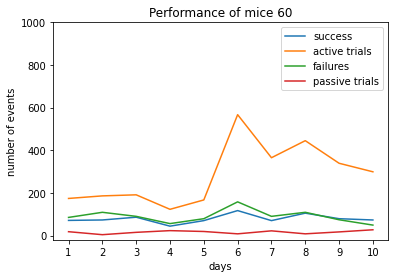

In [42]:
plt.title("Performance of mice 60")
plt.plot(number_successes, label='success') 
plt.plot(number_trials, label='active trials')   
plt.plot(number_failures, label='failures')   
plt.plot(number_timeouts, label='passive trials')
plt.xlabel("days")
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.ylabel("number of events")
plt.ylim(-20,1000)
plt.legend()
plt.savefig("performance_60")


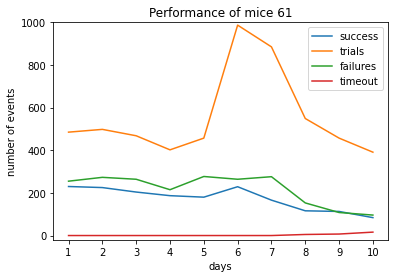

In [43]:
plt.title("Performance of mice 61")

plt.plot(number_successes_61, label='success') 
plt.plot(number_trials_61, label='active trials')   
plt.plot(number_failures_61, label='failures')   
plt.plot(number_timeouts_61, label='passive trials')
plt.xlabel("days")
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.ylabel("number of events")
plt.ylim(-20,1000)
plt.legend()
plt.savefig("performance_61")



In [83]:
wheel_left = []
wheel_right = []
# The with statement will automatically close the file after the operations.
with open("NF_group1/m400060/2021_08_09/20210809-160016_game.log","r") as current_file:
    for line in current_file.readlines():
        if "from the left" in line: 
            wheel_left.append(line)
        elif "from the right" in line:
            wheel_right.append(line)
        
    
 # Show the list:
wheel_left

['[16:00:20]{training.py:75} INFO - Starting trial 1 from the left with             0.3 s delay\n',
 '[16:00:26]{training.py:75} INFO - Starting trial 2 from the left with             0.0 s delay\n',
 '[16:00:28]{training.py:75} INFO - Starting trial 3 from the left with             0.2 s delay\n',
 '[16:00:45]{training.py:75} INFO - Starting trial 4 from the left with             0.2 s delay\n',
 '[16:00:50]{training.py:75} INFO - Starting trial 5 from the left with             0.3 s delay\n',
 '[16:00:58]{training.py:75} INFO - Starting trial 6 from the left with             0.3 s delay\n',
 '[16:01:25]{training.py:75} INFO - Starting trial 7 from the left with             0.1 s delay\n',
 '[16:01:27]{training.py:75} INFO - Starting trial 8 from the left with             0.1 s delay\n',
 '[16:01:29]{training.py:75} INFO - Starting trial 9 from the left with             0.3 s delay\n',
 '[16:01:38]{training.py:75} INFO - Starting trial 10 from the left with             0.2 s delay\n',

In [93]:
times_left = []
times_right = []
for i in wheel_left:
    times_left.append(get_time(i))
    
for i in wheel_right:
    times_right.append(get_time(i))    
times_right[:10]   

[[58248],
 [58274],
 [58277],
 [58314],
 [58317],
 [58379],
 [58429],
 [58435],
 [58438],
 [58500]]

In [94]:
times_left[:10]

[[57620],
 [57626],
 [57628],
 [57645],
 [57650],
 [57658],
 [57685],
 [57687],
 [57689],
 [57698]]

In [100]:
wheel=data['states'][5296:-1, 0]

NameError: name 'data' is not defined

In [99]:
plt.plot(wheel[times_left[0]])

NameError: name 'wheel' is not defined

In [81]:
wheel_left[:10]


['[16:00:20]{training.py:75} INFO - Starting trial 1 from the left with             0.3 s delay\n',
 '[16:00:26]{training.py:75} INFO - Starting trial 2 from the left with             0.0 s delay\n',
 '[16:00:28]{training.py:75} INFO - Starting trial 3 from the left with             0.2 s delay\n',
 '[16:00:45]{training.py:75} INFO - Starting trial 4 from the left with             0.2 s delay\n',
 '[16:00:50]{training.py:75} INFO - Starting trial 5 from the left with             0.3 s delay\n',
 '[16:00:58]{training.py:75} INFO - Starting trial 6 from the left with             0.3 s delay\n',
 '[16:01:25]{training.py:75} INFO - Starting trial 7 from the left with             0.1 s delay\n',
 '[16:01:27]{training.py:75} INFO - Starting trial 8 from the left with             0.1 s delay\n',
 '[16:01:29]{training.py:75} INFO - Starting trial 9 from the left with             0.3 s delay\n',
 '[16:01:38]{training.py:75} INFO - Starting trial 10 from the left with             0.2 s delay\n']

In [82]:
wheel_right[:10]

['[16:10:48]{training.py:75} INFO - Starting trial 33 from the right with             0.1 s delay\n',
 '[16:11:14]{training.py:75} INFO - Starting trial 34 from the right with             0.4 s delay\n',
 '[16:11:17]{training.py:75} INFO - Starting trial 35 from the right with             0.4 s delay\n',
 '[16:11:54]{training.py:75} INFO - Starting trial 36 from the right with             0.3 s delay\n',
 '[16:11:57]{training.py:75} INFO - Starting trial 37 from the right with             0.4 s delay\n',
 '[16:12:59]{training.py:75} INFO - Starting trial 38 from the right with             0.2 s delay\n',
 '[16:13:49]{training.py:75} INFO - Starting trial 39 from the right with             0.5 s delay\n',
 '[16:13:55]{training.py:75} INFO - Starting trial 40 from the right with             0.1 s delay\n',
 '[16:13:58]{training.py:75} INFO - Starting trial 41 from the right with             0.1 s delay\n',
 '[16:15:00]{training.py:75} INFO - Starting trial 42 from the right with         

In [54]:
# trial_nums = [int(s[64:s.index(' from')]) for s in trials_numbers]
# trial_nums

In [63]:
t0 = t_str_to_ts(trials_numbers[0])#[1:24])
times = [t_str_to_ts(line)-t0 for line in trials_numbers]
times

ValueError: time data '[16:00:20]{training.py:75} INFO - Starting trial 1 from the left with             0.3 s delay\n' does not match format '%H:%M:%S'

In [55]:
endings = []
with open("NF_group1/m400060/2021_08_09/20210809-160016_game.log","r") as current_file:
    for line in current_file.readlines():
        if "Ending trial" in line:
            endings.append(line)

In [56]:
rs = np.array(['goal' in e for e in endings])
ts = np.array(times[:-1])
spm = []
success_times = ts[rs>0]
ps = 30
for n in range(0, int((ts[-1])/ps)):
    spm.append(np.sum(np.logical_and(success_times >= n*ps, success_times <(n+1)*ps)))    

NameError: name 'times' is not defined

In [22]:
rs = np.array(['timeout' in e for e in endings])
rs

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False,

In [ ]:
rt = np.array(['Timeout' in e for e in endings])
timeout_times = ts[rt>0]

In [ ]:
active_trials = []
with open("20210812-170717_game.log","r") as current_file:
    for line in current_file.readlines():
        if "Starting trial" in line:
            active_trials.append(line)
t = np.array(times)            
at = np.array(['Starting' in e for e in active_trials])
trials_times = t[at>0] 
trials_times

In [ ]:
timeouts = []
with open("20210812-170717_game.log","r") as current_file:
    for line in current_file.readlines():
        if "Timeout" in line:
            timeouts.append(line)
len(timeouts)
            

In [ ]:
rf = np.array(['overshoot' in e for e in endings])
failure_times = ts[rf>0]
len(failure_times)

In [ ]:
fig, ax = plt.subplots(2, figsize=(24, 6))
ax[0].scatter(ts[rs>0], rs[rs>0], c='r')
ax[0].scatter(ts[rs<.1], rs[rs<.1], c='k')
ax[1].plot(spm)
plt.savefig('success rate')

In [ ]:
len(success_times)

In [ ]:
len(failure_times)

In [ ]:
len(timeout_times)

Additional Methods

In [ ]:
trial_times = []
for line in trials_numbers: # Use the lines list from before (these are all lines that contained 'overshoot')
    trial_times.append(get_time(line))

trial_times # Show the list:



In [ ]:
successes = []
def reg_exp():
    pattern = 'success due to "goal"'
    infile = open('20210812-170717_game.log', 'r')
    match_count = 0
    lines = 0

    for line in infile:
        match = re.search(pattern, line)
        if match:
            match_count += 1
            lines += 1
            successes.append(line)
    return (lines, match_count)

if __name__ == "__main__":
    lines, match_count = reg_exp()
    print ('LINES::', lines)
    print ('MATCHES::', match_count)
    
trials = []
def reg_exp_trials():
    pattern = 'Starting trial'
    infile = open('20210812-170717_game.log', 'r')
    match_count = 0
    lines = 0

    for line in infile:
        match = re.search(pattern, line)
        if match:
            match_count += 1
            lines += 1 
            trials.append(line)
    return (lines, match_count)
    

if __name__ == "__main__":
    lines, match_count = reg_exp_trials()
    print ('LINES::', lines)
    print ('MATCHES::', match_count)
    
    
timeouts = []
def reg_exp_timeout():
    pattern = 'Hold movement exceeded. Timeout'
    infile = open('20210812-170717_game.log', 'r')
    match_count = 0
    lines = 0

    for line in infile:
        match = re.search(pattern, line)
        if match:
            match_count += 1
            lines += 1
            timeouts.append(line)
    return (lines, match_count)

if __name__ == "__main__":
    lines, match_count = reg_exp_timeout()
    print ('LINES::', lines)
    print ('MATCHES::', match_count)  
    
failures = []
def reg_exp_failure():
    pattern = 'failure due to "overshoot"'
    infile = open('20210812-170717_game.log', 'r')
    match_count = 0
    lines = 0

    for line in infile:
        match = re.search(pattern, line)
        if match:
            match_count += 1
            lines += 1 
            failures.append(line)
    return (lines, match_count)
    

if __name__ == "__main__":
    lines, match_count = reg_exp_failure()
    print ('LINES::', lines)
    print ('MATCHES::', match_count)
    
failures    
    
    

In [ ]:
def get_time(string):
    pattern = re.compile("[0-9]{2}:[0-9]{2}:[0-9]{2}") # Abstract form of time stamps using regular expressions.
    pos = pattern.search(string) # Find the locations of the pattern in the string.
    
    # Timestamps have the form hh:mm:ss
    hrs = string[pos.start():pos.start()+2] 
    mins = string[pos.start()+3:pos.start()+5]
    secs = string[pos.start()+6:pos.start()+8]
    
    # Return the hours, minutes and seconds, converted to numbers (here integers)
    return [int(hrs)*3600 + int(mins)+60 + int(secs)]




def get_success(string):
    pattern = re.compile("Successes:.*[0-9].*") # Check for 'Success:' followed by any element, followed by any number of numbers.
    pos = pattern.search(string)
    match = string[pos.start():pos.end()]
    
    number_pattern = re.compile("[0-9]+") # Check for numbers (must at least have one digit).
    number_pos = number_pattern.search(match) # Find numbers in match.
    return int(match[number_pos.start():number_pos.end()])




In [ ]:
trial_nums = [int(s[64:s.index(' from')]) for s in trials_numbers]
trial_nums

In [ ]:
for i in range(len(trial_times)):
    print("Time: ", trial_times[i], " ;  number of trials: " , trials_numbers)       

In [ ]:
success_times = []
success_numbers = []

with open("20210812-170717_game.log","r") as current_file:
    for line in current_file.readlines():
        # Should be ensured that 'Success' is in the line, before throwing the regular expression function at 
        # the string. Otherwise a 'nothing' could be returned. I did not make exception cases for these kind
        # of things to keep the examples simple.
        if "Success" in line: 
            success_times.append(get_time(line))
            success_numbers.append(get_success(line))
            
# Displaying both together needs some additional printing
unique_numbers = list(set(success_numbers))
success = []
for i in range(len(unique_numbers)):
    success.append(i)
    print("Time: ", success_times[i], " ;  number of successes: " , unique_numbers[i])
success       

# Plots

In [ ]:
plt.scatter(success_times, success_numbers)

In [ ]:
plt.plot(failures)